In [1]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [13]:
# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='1nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 5000000

print(f'Circuit:{circuit_n}, Variant:{variant}')

lsa_df= pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%rparametersets_balanced.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(lsa_df['system_class'].value_counts())


Circuit:circuit14, Variant:1nd
simple stable           5191697
complex unstable         167955
hopf                       1358
turing I oscillatory         89
no steady state              17
turing I                      3
turing I hopf                 2
Name: system_class, dtype: int64


In [18]:
df_confusion_preReindexing = pd.crosstab( lsa_df['balance'], lsa_df['system_class'], normalize='index')*100
ind = ['Balanced','Semi balanced','Not balanced']
cols = ['simple stable','simple unstable','no steady state','complex unstable','hopf', 'turing I hopf', 'turing I oscillatory', 'turing I']
cols = ['simple stable','no steady state','complex unstable','hopf', 'turing I hopf', 'turing I oscillatory', 'turing I']
df_confusion = df_confusion_preReindexing[cols]
# ind = ['Balanced','Semi balanced','Not balanced']
df_confusion = df_confusion_preReindexing.reindex(ind)
if len(df_confusion_preReindexing.columns) == len(df_confusion.columns):
    print('Columns match')
else:
    print('Columns dont match')

Columns match


Numerical information


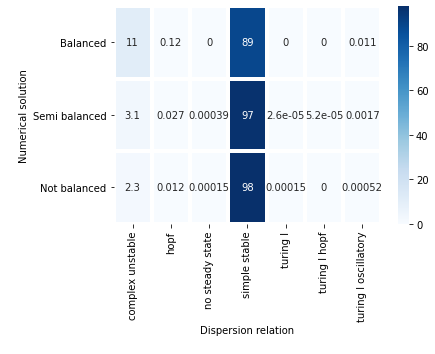

In [19]:

# cf_matrix_marti2 = np.array([[0,1,0,1,1,1,1,1],[0,1,0,1,1,1,1,1],[0,1,0,1,1,1,1,1],[1,1,0,1,1,1,1,0]])
ax = sns.heatmap(df_confusion, linewidths=4,annot=True, cmap='Blues',cbar=True)

ax.set_ylabel('\nNumerical solution')
ax.set_xlabel('Dispersion relation\n');
# pattern_list = ['Temporal Oscillator', 'Non-Stationary heterogeneity','Homogeneous', 'Stationary spatial wave']

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['Turing I','Turing I oscillatory','Turing II', 'Turing I Hopf', 'Hopf instability', 'Complex unstable', 'Simple unstable', 'simple stable'], rotation=90)
# ax.yaxis.set_ticklabels(pattern_list, rotation=0)
## Display the visualization of the Confusion Matrix.
# plt.tight_layout()
# plt.savefig('cf_marti')
print('Numerical information')
plt.show()



In [17]:
print(zeroSignChanges_df['muLVA'])

22      2    3.767555
61      2     3.38203
69      2     4.07284
82      2     4.12832
156     0    4.209076
               ...   
999898  2    4.232196
999914  2    3.106017
999969  2    3.358294
999980  1    3.849816
999988  2    4.157602
Name: muLVA, Length: 33980, dtype: object


In [18]:

def plotDist(parameterDictList,lhsDist_df):
    nvar = len(parameterDictList)
  
    fig,axs = plt.subplots(nrows=1,ncols=nvar,figsize=(nvar*5,5))
    for count,parameter in enumerate(parameterDictList):
        name = parameter['name']
        lhsDistColumn = lhsDist_df[name]
        sns.histplot(lhsDistColumn, ax=axs[count], bins=100)
        axs[count].set(ylabel ='',yticks=[],yticklabels=[])
        axs[count].set_xlabel(name, fontsize=15)
        # axs[count].set_xscale('log')
    plt.show()